# -*- coding: utf-8 -*-
"""
Created on Wed Jul 17 23:13:41 2019

@author: JJ
"""

In [1]:

# 將新版本的特性導入到當前版本 (非人工智慧使用)
from __future__ import print_function

#---------------------------------------------------------------------

# NumPy是Python語言的一個擴充程式庫。
# 支援高階大規模的多維陣列與矩陣運算，針對"陣列運算"提供大量的數學函式函式庫。
import numpy as np

# pandas是Python程式語言的用於資料操縱和分析的軟體庫。
# 特別是，它提供操縱數值表格和時間序列的資料結構和運算操作。
import pandas as pd

# matplotlib是Python語言及其數值計算庫NumPy的繪圖庫。
# Pyplot 是 Matplotlib 的子庫，提供了和 MATLAB 類似的繪圖 API。
# Pyplot 是常用的繪圖模塊，能很方便讓用戶繪製 2D 圖表。
import matplotlib.pyplot as plt

#---------------------------------------------------------------------

# Keras是一個用Python編寫的開源神經網路庫
# 旨在快速實現深度神經網路，專注於使用者友好、模組化和可延伸性。
import keras
# 引入 配置訓練模型
from keras.models import Sequential
# 引入 全連接層(Dense)、輸入(Dropout)、激活函數(Activation)
from keras.layers import Dense, Dropout, Activation
# 引入 卷積運算、最大池化、展平一個張量
from keras.layers import Conv2D,MaxPooling2D,Flatten
# mnist手寫數字數據集
from keras.datasets import mnist

# 保存/加載整個模型
from keras.models import load_model

# 通過實時數據增強生成張量圖像數據批次。數據將不斷循環（按批次）。
from keras.preprocessing.image import ImageDataGenerator
# 當標準評估停止提升時，降低學習速率。
from keras.callbacks import ReduceLROnPlateau

#---------------------------------------------------------------------

# SciPy包含的模組有最佳化、線性代數、積分、插值、特殊函數、快速傅立葉轉換、
# 訊號處理和圖像處理、常微分方程式求解和其他科學與工程中常用的計算。
import scipy

In [2]:
# import os
import os
# 使用CPU
# os.environ["CUDA_VISIBLE_DEVICES"]='-1' 

# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

# TensorFlow是一個開源軟體庫，用於各種感知和語言理解任務的機器學習。
import tensorflow as tf
# TensorFlow 是否能抓到 GPU
print(tf.test.is_gpu_available())

# 印出TensorFlow版本信息
print('Tensorflow Version:{}'.format(tf.__version__))

# 取出CPU、GPU資料 用陣列顯示
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
Tensorflow Version:2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
# tensorflow抓到的可用 運算設備 詳細資料
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15360113217130069355
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1421495502
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12147482698791089837
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 750 Ti, pci bus id: 0000:01:00.0, compute capability: 5.0"
xla_global_id: 416903419
]


In [4]:
# 模型建構
model = Sequential()
# 捲積層_1
model.add(Conv2D(
    filters=16,
    kernel_size=(5,5),
    padding='same',
    input_shape=(28,28,1)
    ))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
   
# 捲積層_2
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 展平張量
model.add(Flatten())
    
# 全連接層 激活函數
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# 全連接層 激活函數
model.add(Dense(10,activation='softmax'))
    
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 activation (Activation)     (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 36)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                    

In [5]:
batch_size = 256 # 批次大小
num_classes = 10 # 類別大小
epochs = 50 # 訓練迭代次數
(x_train, y_train), (x_test, y_test) = mnist.load_data()# 分割訓練集資料與測試集資料

In [6]:
x_test_bk = x_test.copy()   # 備份 X_test 資料集 (為了最後推論模型用)
y_test_bk = y_test.copy()   # 備份 Y_test 資料集

In [7]:
#調整目標樣本型態，訓練集資料
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# 轉換類別向量為二進制分類
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08,
    data_format="channels_last"
)
gen.fit(x_train)
train_generator = gen.flow(x_train, y_train, batch_size)

In [10]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
learning_rate_function = ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.000005
)

In [12]:
history = model.fit_generator(train_generator,
            steps_per_epoch=235,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[learning_rate_function])
loss,acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", acc)

C:\Users\KUO\AppData\Local\Temp\ipykernel_13008\2572384998.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
235/235 [==============================] - 49s 131ms/step - loss: 0.5823 - accuracy: 0.8109 - val_loss: 0.0702 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - 30s 129ms/step - loss: 0.1811 - accuracy: 0.9461 - val_loss: 0.0410 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 3/50
235/235 [==============================] - 31s 134ms/step - loss: 0.1329 - accuracy: 0.9606 - val_loss: 0.0312 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 4/50
235/235 [==============================] - 27s 116ms/step - loss: 0.1113 - accuracy: 0.9666 - val_loss: 0.0264 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 5/50
235/235 [==============================] - 26s 110ms/step - loss: 0.0933 - accuracy: 0.9717 - val_loss: 0.0238 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 6/50
235/235 [==============================] - 26s 109ms/step - loss: 0.0858 - accuracy: 0.9742 - val_loss: 0.0220 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 7/50
235/235 [==============================] 

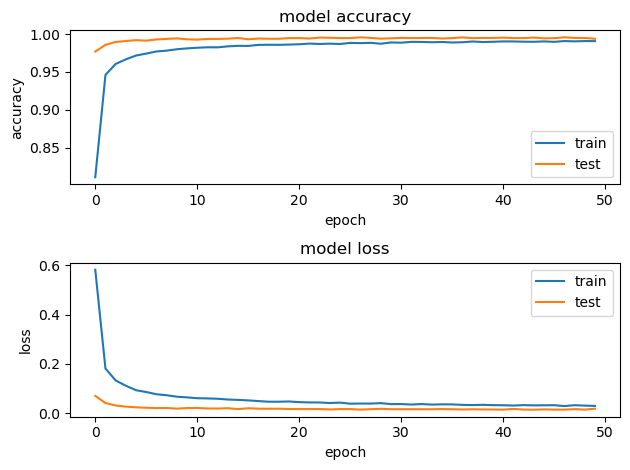

In [13]:

#透過matplot繪圖顯示訓練過程
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.tight_layout()
plt.show()

In [14]:
# 計算分類的預測值
print("\nPredicting ...")
y_pred = model.predict(x_test)
y_pred_classes= np.argmax(y_pred,axis=1)

# 顯示混淆矩陣
tb = pd.crosstab(y_test_bk.astype(int), y_pred_classes.astype(int), rownames=["label"], colnames=["predict"])
print(tb)


Predicting ...
313/313 [==============================] - 1s 3ms/step
predict    0     1     2     3    4    5    6     7    8     9
label                                                         
0        978     0     0     0    0    0    0     1    1     0
1          2  1127     0     1    1    0    0     3    1     0
2          0     1  1028     1    0    0    0     2    0     0
3          0     0     0  1008    0    1    0     0    1     0
4          0     0     0     0  977    0    0     1    0     4
5          1     0     0     5    0  884    1     0    0     1
6          3     0     0     0    2    2  949     0    2     0
7          0     2     5     0    0    0    0  1020    0     1
8          0     0     1     2    0    2    0     1  967     1
9          0     0     0     2    4    2    0     1    0  1000


In [15]:
model.save("mnist_cnn.h5")

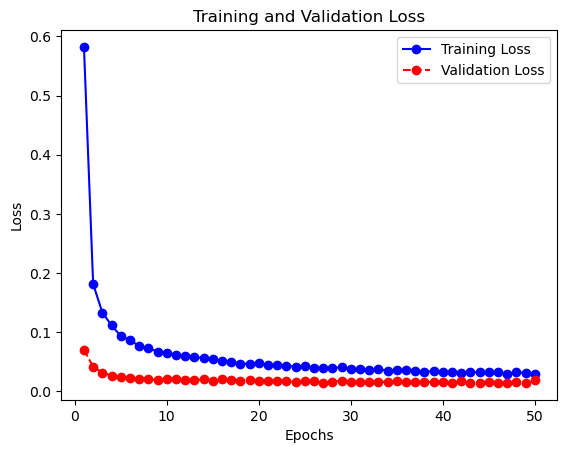

In [16]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


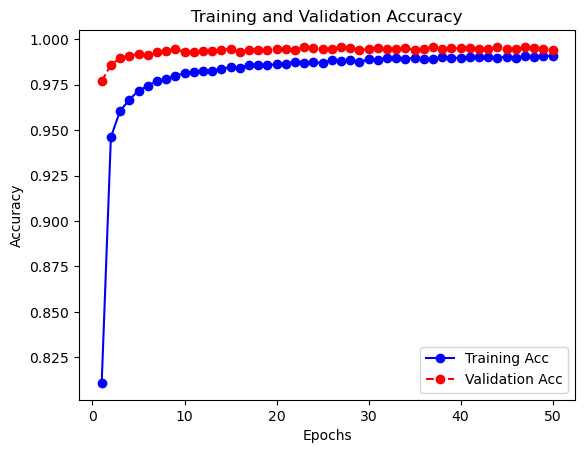

In [17]:
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
# 亂數選一個測試的數字圖片 
i = np.random.randint(0, len(x_test))
digit = x_test_bk[i].reshape(28, 28)
# 將圖片轉換成 4D 張量
X_test_digit = x_test_bk[i].reshape(1, 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_digit = X_test_digit / 255

In [19]:
# 建立Keras的Sequential模型
model_inference = Sequential()
model_inference = load_model("mnist_cnn.h5")
# 編譯模型
model_inference.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

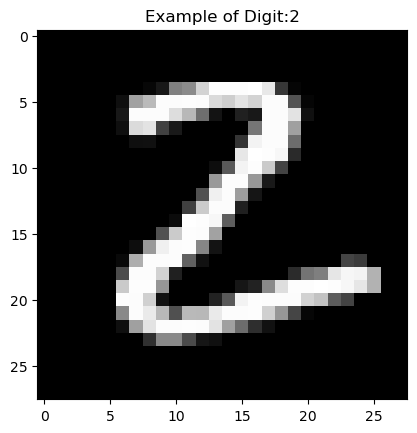

In [20]:
# 繪出圖表的預測結果
plt.figure()
plt.title("Example of Digit:" + str(y_test_bk[i]))
plt.imshow(digit, cmap="gray")

In [21]:
# 預測結果的機率
print("Predicting ...")
probs = model_inference.predict(X_test_digit, batch_size=1)
print(probs)

Predicting ...
1/1 [==============================] - 0s 357ms/step
[[3.2150057e-12 1.2795547e-10 1.0000000e+00 2.5066899e-10 1.0190283e-13
  4.9726165e-16 3.1722569e-12 3.1457192e-10 3.1716461e-12 2.7937873e-13]]


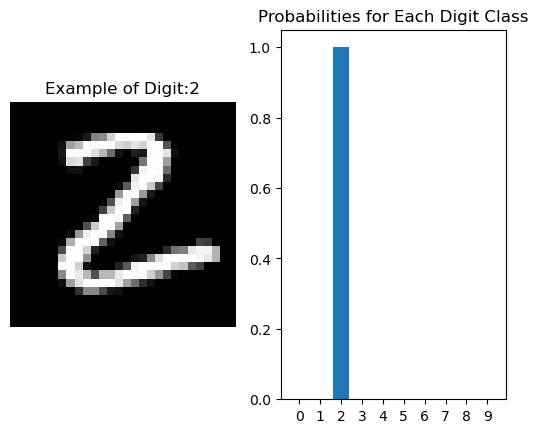

In [22]:
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(y_test_bk[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

In [23]:
# 測試資料集的分類和機率的預測值
y_pred_probs = model_inference.predict(x_test)     # 預測機率
y_pred_classes= np.argmax(y_pred_probs,axis=1)   # 轉成分類

313/313 [==============================] - 1s 3ms/step


In [24]:
# 建立分類錯誤的 DataFrame 物件
df = pd.DataFrame({"label":y_test_bk, "predict":y_pred_classes})
df = df[y_test_bk!=y_pred_classes]  # 篩選出分類錯誤的資料
print(df.head()) # 看前五筆分類錯誤

     label  predict
445      6        0
582      8        3
583      2        7
625      6        4
659      2        1


0 Index:  8316


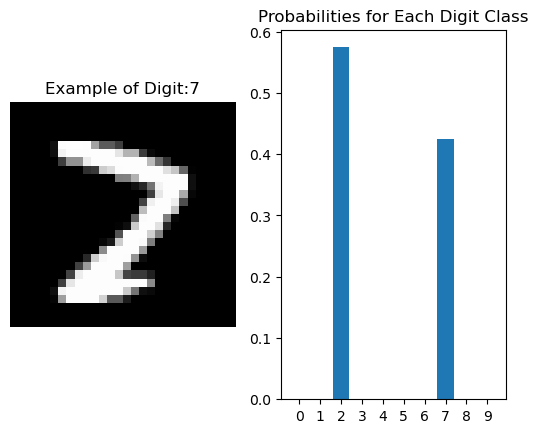

1 Index:  9792


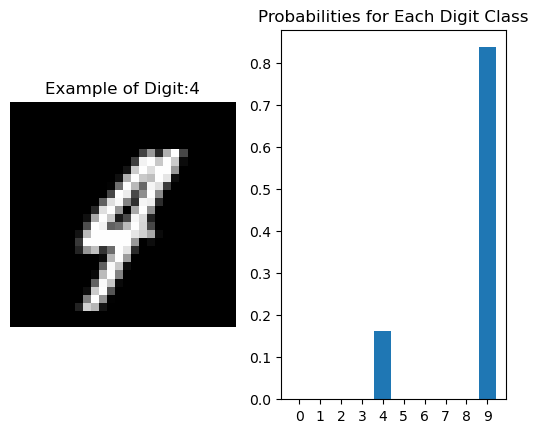

2 Index:  9792


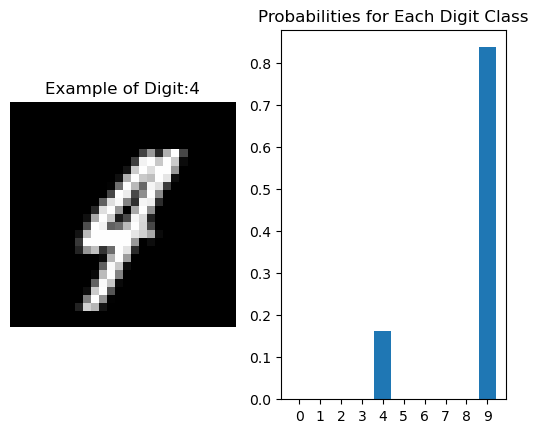

3 Index:  716


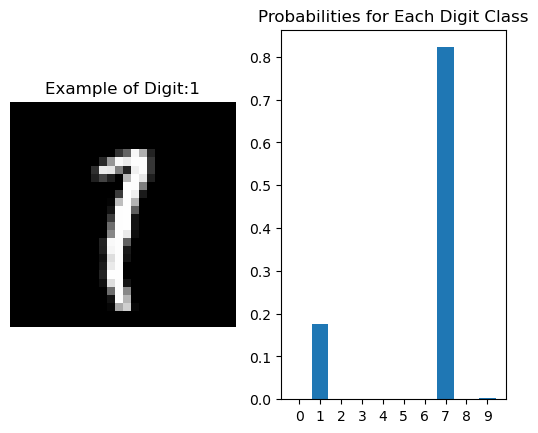

4 Index:  9729


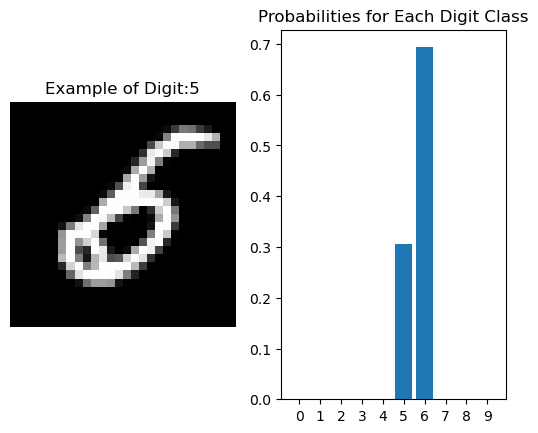

5 Index:  9622


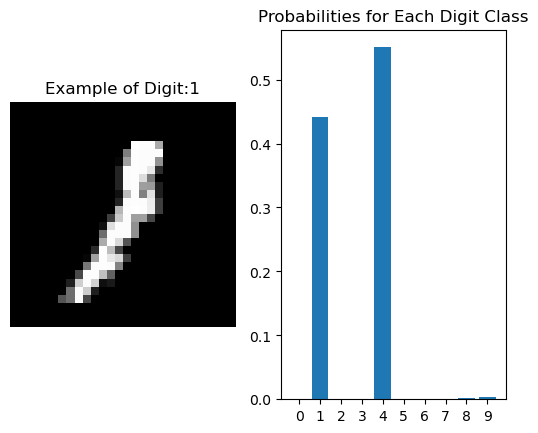

6 Index:  3225


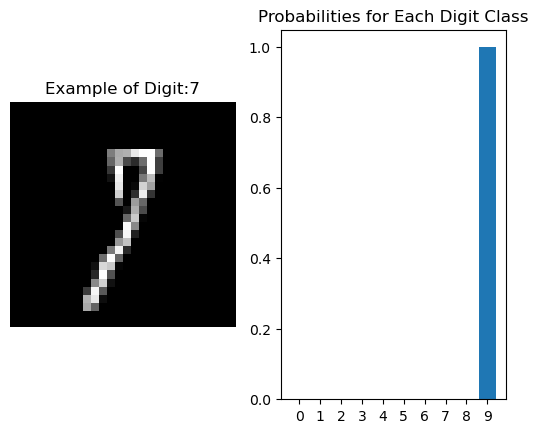

7 Index:  5997


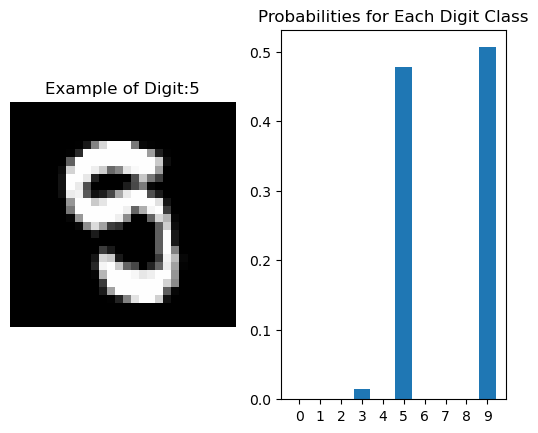

8 Index:  9622


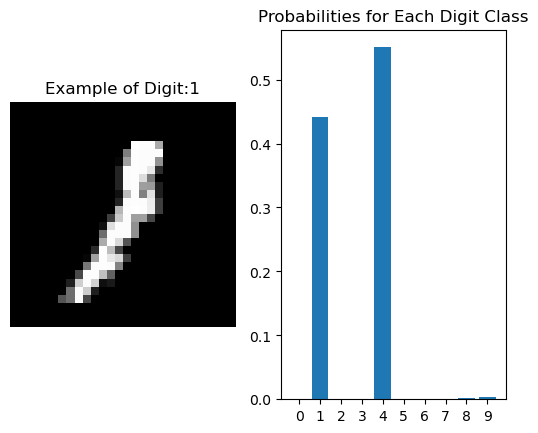

9 Index:  674


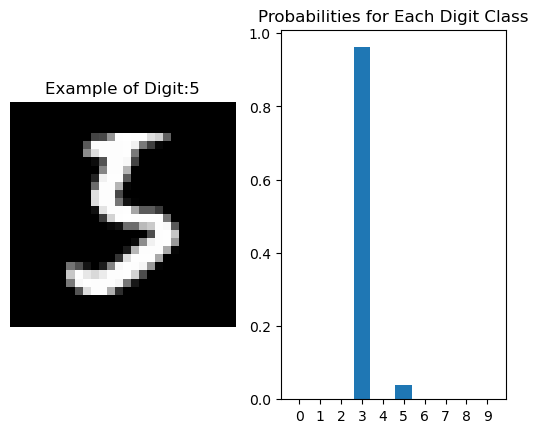

In [25]:
# 隨機選 1 個錯誤分類的數字索引
l = 0
while l<10 and df.size!=0:
  i = df.sample(n=1,replace=False).index.values.astype(int)[0]
  print(l ,"Index: ", i)
  digit = x_test_bk[i].reshape(28, 28) 
  # 繪出圖表的預測結果
  plt.figure()
  plt.subplot(1,2,1)
  plt.title("Example of Digit:" + str(y_test_bk[i]))
  plt.imshow(digit, cmap="gray")
  plt.axis("off")
  plt.subplot(1,2,2)
  plt.title("Probabilities for Each Digit Class")
  plt.bar(np.arange(10), y_pred_probs[i].reshape(10), align="center")
  plt.xticks(np.arange(10),np.arange(10).astype(str))
  plt.show()
  l+=1

In [26]:
# 預測錯誤的筆數
len(df)

62